Homework 1 — (20 points)
======
### What to hand in
1. A Jupyter notebook containing all code and output (figures and audio). We should be able to evaluate the file to reproduce all output. 
1. Any other data that we tell you to save to a file (e.g. audio files).

### How to hand it in
1. Compress all of the files specified into a .zip file. 
1. Name the file in the following manner, firstname_lastname_hw1.zip. For example, Bryan_Pardo_hw1.zip. 
1. Submit this .zip file via Canvas

## Run this code block 1st, to import likely needed packages

In [1]:
# This line imports most packages you'll need. You may need to import others (eg random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math
from IPython.display import Audio

# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

## Sampling Culture

#### 1. (1 point) A lot of modern music is remix music, building on existing recordings. Here are several examples: Cardi B "I Like It",  Coolio's "Gangster's Paradise", Kanye West's "Gold Digger", Drake's "Nice for What". Name the artist and title of a song that is prominently sampled in each of these songs.  Listen to each song you mention that was sampled. Did you discover an artist or a song that you like? If so, which one(s)?

Cardi B "I Like It" - Pete Rodriguez "I Like It Like That"
Coolio "Ganster's Paradise" - Stevie Wonder, "Pastime Paradise"
Kanye West "Gold Digger" - Ray Charles "I Got a Woman"
Drake "Nice For What" - Lauryn Hill "Ex-Factor"

I'd already known and loved all of these artists before, except Pete Rodriguez (who is amazing!). But, I just added "Ex-Factor" to my current playlist...

## The Basics

#### 2. (1 point) Explain, in your own words, how the cochlea detects and encodes the frequency and amplitude content of sound. 

SOund waves vibrate the eardrum at different frequencies, which then pushes the tiny ear bones, that then move fluid inside the cochlea, which then vibrates the hair cells inside the organ of corti. These hair cells resonate at different frequenies. Higher frequencies are sensed at the base of the cochlea and lower frequencies are sensed at the apex.  So, the section of the fibers that is vibrating relates to the frequency(ies) that you hear. Louder (generally, higher amplitude) sounds move hair cells more which generates more frequent action potentials that the brain can sense.

#### 3-A. (0.5 point)   The sample rate of telephone audio (8 kHz) and CD quality audio (44.1 kHz) are very different. Express in Hz the highest frequency sound you can represent (without aliasing) at each of these two sample rates. How do these frequencies compare to the highest frequency a typical human with no hearing loss can hear?

Telephone sampling (8Hz) - 4 Hz sound max can be sampled w/o aliasing
CD sampling (44.1Hz) - 22.05Hz sound max can be sampled w/o aliasing

#### 3-B. (0.5 point) Sample rate isn't the only difference between CD and telephone audio. Express in dB the dynamic range (range of loud to soft) of 8 bit audio (telephone quality) and 16 bit audio (CD quality).  How many bits would one need to exceed the dynamic range of human hearing? Use the formula for voltage dB (i.e.   $20*log_{10}(X/X_{ref})$ )  Show your work.  (Hint: what is the difference between the smallest number you can represent in 8 bits and the largest number?)

In [2]:
# assign your answers to these variables
range8 = None
range16 = None
range_diff = None
n_bits_human = None

# your code goes here
x_ref = 1 # lowest quantifiable/identifiable/pick-up-able number in the range (not 0 cause can't hear zero)
human_dynamic_range = 120 # dB - pain threshold

def db_range(bits):
    return 20 * math.log((2**bits/x_ref), 10)

def db_to_bits(db):
    # log_10 (2^x) = db  --> 2^x = 10^db; exponent conversion
    # x * log_2(2) = log_2(10^db); use log on both sides to move x out of exponenet
    # x = log_2(10^db); log base 2 (2) = 1
    return math.ceil(math.log(10**db, 2) / 20) # ceil, because you can't use e.g. 20.1 bits

range8 = db_range(8) # ~48dB
range16 = db_range(16) # ~96dB
range_diff = range16 - range8
n_bits_human = db_to_bits(human_dynamic_range + 1) # + 1 to ~exceed~ human hearing dynamic range --> 21 bits

In [3]:
# you don't need to put anything here, this cell is for the autograder 

In [4]:
# you don't need to put anything here, this cell is for the autograder 

In [5]:
# you don't need to put anything here, this cell is for the autograder 

#### 4. (1 point) Make a function to generate sinewaves.  Write a function to plot an audio signal and use it to display the generated sinewave (you can write your own plotting function or use the "plot_audio" function provided in the previous homework). Label the figure's axes appropriately. Test the function for a simple case (e.g. a sinewave of frequency 10 Hz and length 1 sec, sampled at a rate of 100 Hz).


In [6]:
def make_sinewave(f, t, sr):
    """    
    Parameters
    ----------
    f:  float
        Frequency of sine wave
    t:  float
        Duration in seconds
    sr: int
        Sample rate
    
    Returns
    -------
    np.ndarray 
        Array of floats containing the signal
    """
    # your code goes here
    intervals = np.arange(0,t*sr)/sr
    x = np.sin(2*np.pi*f*intervals)
    return x    

In [7]:
# you don't need to put anything here, this cell is for the autograder 

In [8]:
def plot_audio(x, sr, figsize=(16,4)):
    """
    A simple audio plotting function
    
    Parameters
    ----------
    x: np.ndarray
        Audio signal to plot
    sr: int
        Sample rate
    figsize: tuple
        A duple representing the figure size (xdim,ydim)
    """
    # from HW0
    length = float(x.shape[0]) / sr
    t = np.linspace(0,length,x.shape[0])
    plt.figure(figsize=figsize)
    plt.plot(t, x)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.show()

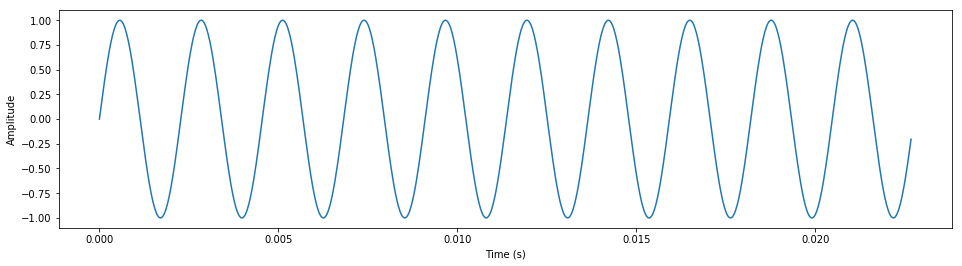

In [9]:
# this is the cell where you should demonstrate your working make_sinewave and plot_audio functions
sr = 44100
x = make_sinewave(440, 2, sr)
plot_audio(x[:1000], sr)

#### 5. (1 point) The case of the missing fundamental is where a sound seems to have a pitch at frequency F0, but has no energy at this frequency.  Instead all the frequency is at integer multiples of F0. Write code to build an audio example that illustrates the case of the missing fundamental: First play a harmonic sound with 10 harmonics (including F0) that all have the same amplitude.  Let's make it the C one octave below Middle C on the piano: 131 Hz. Then, successively remove each harmonic, starting from the lowest, to the highest (F0, then F1....etc). How many harmonics had to disappear before it sounded like the pitch changed?

It took 3 harmonics disappearing before I could hear the pitch change.

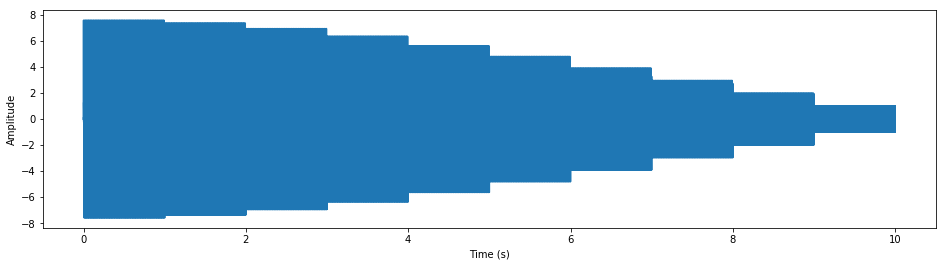

In [10]:
F0 = 131
f_dict = {}
total = np.zeros(sr)
for i in range(1,11): # dict storing 10 arrays of 1 sec of freq (key = freq in hz)
    f_dict[F0*i] = make_sinewave(F0*i, 1, sr)
    total = np.add(total, f_dict[F0*i]) # total of ten harmonics
    
soundseries = total
temp = total
for j in range(1,10): # harmonic subtraction loop
    temp = np.subtract(temp, f_dict[F0*j])
    soundseries = np.append(soundseries, temp)

# plot and play
plot_audio(soundseries, sr)
Audio(soundseries, rate=sr)

#### 6. (1 point) Implement a simple function to express the Root Mean Squared Amplitude of a signal encoded as an array, in dB, with respect to a reference value (review the lecture on amplitude, slides no. 5-8).

In [11]:
def rms_db(signal, reference):
    '''
    Parameters
    ----------
    signal:  np.ndarray 
        Array of floats containing the signal
    reference:  float
        A reference amplitude to compare to 

    Returns
    -------
    float
        a value in dB, given the reference value
    '''
    # your code goes here
    t_d = len(signal)
    sum_amp = 0
    for amp in signal:
        sum_amp += amp**2
        
    x_rms = math.sqrt((1/t_d) * sum_amp)
    
    db_result = 20*math.log(x_rms/reference, 10)
    return db_result

In [12]:
# you don't need to put anything here, this cell is for the autograder 

#### 7. (1 point) Masking is where one sine wave makes a softer sine wave of nearby frequency inaudible. In class, you learned that our frequency sensitivity is related to the log of the frequency. This means that a lower tone will mask a broader frequency range above it than it does below it. We're going to explore that in this problem.  Write code that does the following: Make a sine wave at 440 Hz.  Now, make a 2nd sine wave that is 30 dB softer and 430 Hz. Play them simultaneusly. Now repeatedly lower the frequency of the softer sine wave by 20 Hz. Listen to the resulting series of paired sounds. At what frequency does it become really obvious that there are two sine waves?  Now try it the other direction.  Make the softer tone at 450 Hz and vary it upward (maybe take 40 Hz steps, in the upward direction) each time. Now at what frequency does the softer tone become obvious when the softer tone gets higher instead of lower? Do this experiment with decent headphones in a quiet room. Don't use your laptop speakers in a noisy place.   

Downward: after about 3 seconds
Upward: after about 8 seconds

-3.0102999566397894
-33.01029995663982


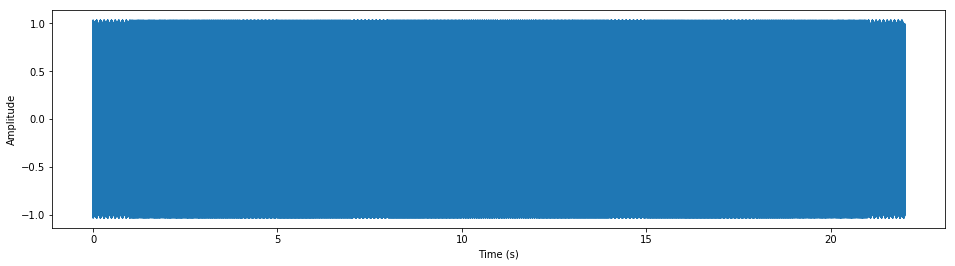

In [13]:
# your code goes here
def make_softer(db_diff):
    """ uses the logarithm equation to make the signal db_diff different from the original sound level"""

    # L_1-L_ref = 20log_10(x_rms/r_rms,ref)
    # -30 = 20log_10(solving_for)
    # solving_for = 10^(-30/20)
    return 10**(db_diff/20)

# downward direction
a_440 = make_sinewave(440, 1, sr)
softer_430 = make_sinewave(430, 1, sr)*make_softer(-30)
print(rms_db(a_440, 1))
print(rms_db(softer_430, 1))

soundseries = np.array([])
soundseries = np.append(soundseries, np.add(a_440, softer_430))
freq = 410
while freq > 0:
    sine_wave = make_sinewave(freq, 1, sr)*make_softer(-30)
    soundseries = np.append(soundseries, np.add(a_440, sine_wave))
    freq -= 20
    

plot_audio(soundseries,sr)
Audio(soundseries, rate=sr)


-3.0102999566397894
-33.01029995663955


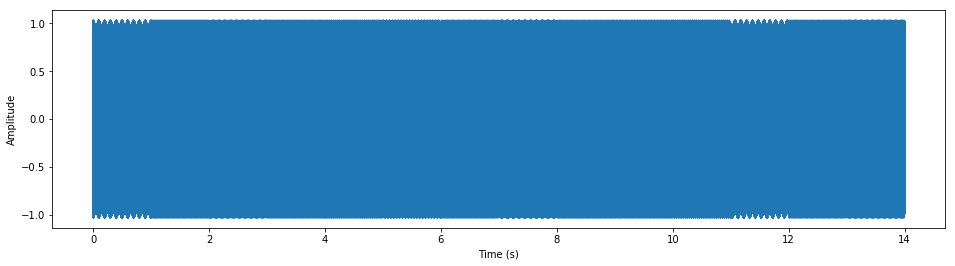

In [14]:
# upward direction

softer_450 = make_sinewave(450, 1, sr)*make_softer(-30)
print(rms_db(a_440, 1))
print(rms_db(softer_450, 1))
soundseries_2 = np.array([])
soundseries_2 = np.append(soundseries_2, np.add(a_440, softer_450))

freq = 490
while freq < 1000:
    sine_wave = make_sinewave(freq, 1, sr)*make_softer(-30)
    soundseries_2 = np.append(soundseries_2, np.add(a_440, sine_wave))
    freq += 40

plot_audio(soundseries_2,sr)
Audio(soundseries_2, rate=sr)

## Using the Fourier transform

#### We're now going to look at using the Fourier transform to create representations for sound that let you analyze it and manipulate. The work you do in the following sections will be much easier if you use the fft and ifft functions from scipy.  See the following link for documentation on them. 
http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html 

#### 8. (one point) Let's look at a signal to see how the Fourier transform lets us understand it more easily. The choice of windowing function for your FFT is an important one. In this problem, we are going to investigate the effect of windowing on the spectra of sine waves. Write a function to compute and plot the log-magnitude spectrum of a signal. Your function must receive the number of frequency samples as an input (there is an optional parameter in scipy's fft that lets you specify how many points the FFT has). 

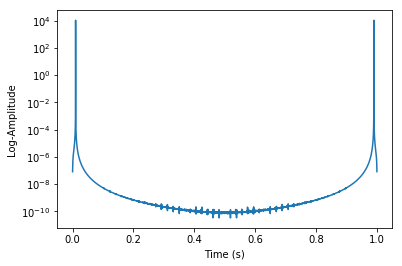

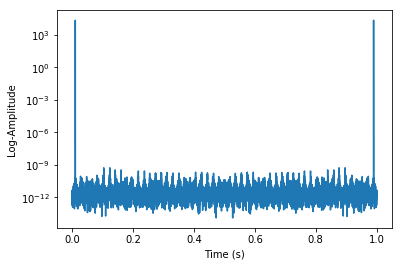

############## NOT EVEN SURE IF THIS IS EVEN RIGHT... this can't be the right plot


In [15]:
from scipy.fftpack import fft, ifft
from scipy.signal import boxcar, hann

def audio_spectrum(sig, win_len, win_type, Nfft):
    """
    Computes the spectrum of an audio signal
    
    Parameters
    ----------
    sig: np.ndarray
        Audio signal 
    win_len: int
        Length of the signal for spectrum computation (in samples)
    win_type: string
        Determines the window type including 'rectangular' and 'hann'
    Nfft: int
        Number of frequency-domain samples 
        
   Returns
    -------
    a numpy array of the magnitude (absolute value) log spectrum.

    """    
    # your code goes here
    
    win = hann(win_len) if win_type == "hann" else boxcar(win_len)
    y = fft(sig*win)
    y = abs(y)
    
    length = float(sig.shape[0]) / sr
    t = np.linspace(0,length,sig.shape[0])
    
    plt.semilogy(t, y)
    plt.ylabel('Log-Amplitude')
    plt.xlabel('Time (s)')
    plt.show()
    return y
    
x = make_sinewave(440, 1, sr)
audio_spectrum(x, len(x), 'hann', len(x)) ####### how to decide Nfft? Is it also just 44100?
audio_spectrum(x, len(x), 'rectangular', len(x))
print("############## NOT EVEN SURE IF THIS IS EVEN RIGHT... this can't be the right plot") ############## NOT SURE IF THIS IS EVEN RIGHT... this can't be the right plot

#### 9. (1 point) Make an audio signal composed of 2 sine waves at 100 and 250 Hz. The sample rate should be 1000 Hz. Now compute the spectrum of the signal using a rectangular window of length 64 samples. In this part we set the number of FFT points to the same value as the window length. Then compute the spectrum using a a Hann window (from scipy.signal). Plot both spectra on the same axis. Compare the two plots. Be sure to label the frequency dimension correctly (horizontal = frequency in Hz) with the correct units. Be sure to label your two lines so we can tell which is which.

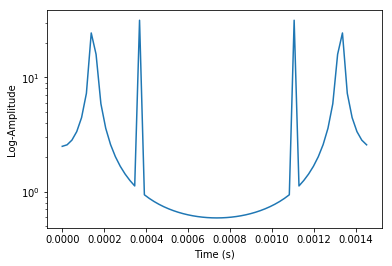

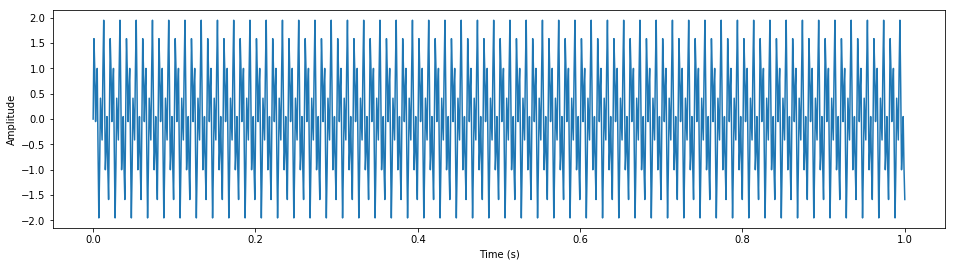

In [29]:
# your code goes here

sr_q9 = 1000
sig_100 = make_sinewave(100, 1, sr_q9)
sig_250 = make_sinewave(250, 1, sr_q9)
signal_q9 = sig_100 + sig_250

# Audio(signal_q9, rate=sr_q9)

# def audio_spectrum(sig, win_len, win_type, Nfft):
win_len_64 = 64
audio_spectrum(signal_q9[:64], win_len_64, 'rectangular', win_len_64)
########### used [:64] to correct this error
########## ValueError: operands could not be broadcast together with shapes (1000,) (64,) 
######### because i do: y = fft(sig*win) in def audio_spectrum


plot_audio(signal_q9, sr_q9) ###### LOOKS WAY DIFF FROM FFT... which i think it's supposed to..


# raise NotImplementedError # delete this line when you add your solution

#### 10. (1 point) Which  windowing approach from the previous question gives a more accurate visualization of the signal contents, windowing the signal with a rectangular window or with a Hann window?  What is the underlying reason? 

Hann. This is beacuse the hann windowing function, which cuts the signal by tapering the ends of the window to zero, removes issues of correcting extreme differences between the beginning and end of the window when trying to connect and make periodic the signal.

#### 11. (1 point)  When you calculate a FFT with more points than are in the signal, zeros are added to the input signal and interpolation is performed on the output signal. In general, zero-padding in the time domain is equivalent to creating new analysis bins in between original bins in the frequency domain. This often gives us a more accurate view of the frequency content in the signal.  We're going to do that here. Do everything exactly like you did in question 9....except increase the number of FFT points (Nfft) to 256. Note...keep the window length win_len the same, just vary Nfft. 

#### What are some of differences you notice in this plot compared to the previous one? 

You can read more about the effect of zero-padding on the frequency-domain representation in the follwing pages:

http://www.dsprelated.com/freebooks/sasp/Zero_Padding_Time_Domain.html

http://dspguru.com/dsp/howtos/how-to-interpolate-in-time-domain-by-zero-padding-in-frequency-domain



YOUR ANSWER HERE


 ########## I notice no differences, so #8,9, and 11 are likely wrong...


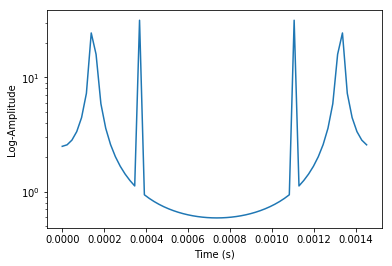

array([ 2.48989828,  2.56657029,  2.82112184,  3.35025908,  4.44395417,
        7.25204121, 24.48978193, 15.92480079,  5.87598894,  3.58301334,
        2.57863228,  2.02016471,  1.6673621 ,  1.42590179,  1.25131039,
        1.1199359 , 31.65102074,  0.9372564 ,  0.8719822 ,  0.81853167,
        0.77430646,  0.73744226,  0.70657161,  0.68067337,  0.65897409,
        0.64088194,  0.62594117,  0.61380056,  0.60419094,  0.59690941,
        0.59180804,  0.58878615,  0.58778525,  0.58878615,  0.59180804,
        0.59690941,  0.60419094,  0.61380056,  0.62594117,  0.64088194,
        0.65897409,  0.68067337,  0.70657161,  0.73744226,  0.77430646,
        0.81853167,  0.8719822 ,  0.9372564 , 31.65102074,  1.1199359 ,
        1.25131039,  1.42590179,  1.6673621 ,  2.02016471,  2.57863228,
        3.58301334,  5.87598894, 15.92480079, 24.48978193,  7.25204121,
        4.44395417,  3.35025908,  2.82112184,  2.56657029])

In [21]:
# your code goes here
print("\n ########## I notice no differences, so #8,9, and 11 are likely wrong...")
audio_spectrum(signal_q9[:64], win_len_64, 'rectangular', 256)

##### I notice no differences, so #8,9, and 11 are likely wrong...

#### 12. (1 point). What is the pitch (in Hz) of the lowest note played by an in-tune piano using equal temperment tuned at A440? What is the pitch (in Hz) of the highest note? Now, given these numbers, assume you're recording at 44100 Hz (CD quality audio). Give a window length (in samples) so that the spacing between frequencies of analysis of a fast Fourier transform (the fft function you call to make the spectrogram) is low enough to capture the lowest note on the piano.  Remember, the lowest non-zero frequency of analysis is going to be equal to the spacing between the frequencies of analysis.

In [18]:
window_length = None
# your code goes here

# f_analysis = sr/num_samples_in_window

raise NotImplementedError # delete this line when you add your solution

NotImplementedError: 

In [ ]:
# you don't need to put anything here, this cell is for the autograder 

#### 13. (2 points) Make a short term Fourier transform (STFT) function. Use the fft and ifft functions from scipy. 

In [ ]:
from scipy.fftpack import fft
from scipy.signal import hann

def stft(signal, window_size, hop_size, window_type = 'hann'):
    """
    Computes the short term fourier transform of a 1-D numpy array, where the array 
    is windowed into a set of subarrays, each of length window_size. The distance between
    window centers (in samples) is given by hop_size. The type of window applied is
    determined by window_type. This returns a 2-D numpy array where the ith column
    is the FFT of the ith window. Each column contains an array of complex values.
    
    Input Parameters
    ----------------
    signal: The 1-d (complex or real) numpy array containing the signal
    window_size: an integer scalar specifying the number of samples in a window
    hop_size: an integer specifying the number of samples between the start of adjacent windows
    window_type: a string specifying one of two "hann" or "rectangular"
    
    Returns
    -------
    a 2D numpy array of complex numbers where the array column is the FFT of the ith window,
    and the jth element in the ith column is the jth frequency of analysis.
    """
    # your code goes here
    raise NotImplementedError # delete this line when you add your solution

In [ ]:
# you don't need to put anything here, this cell is for the autograder 

#### 14. (2 points) Make an inverse STFT function to rebuild the original audio signal, using overlap & add resynthesis. You don't need to use a window function here.

Note: we are not using a synthesis window for this exercise. However, keep in mind that in general it's recommended to weight the inverse Fourier transform of each frame by the same window function used for generating the spectrogram at each step of overlap & add (a.k.a. weighted overlap & add). The synthesis window helps reducing the effect of impulsive noise caused by modifying the audio spectrogram. 

See also https://ccrma.stanford.edu/~jos/sasp/Weighted_Overlap_Add.html

In [ ]:
from scipy.fftpack import ifft

def istft(X, hop_size): # if i get complex numbers, remain calm, call np.abs() - the complex numbers should all be basically 0
    """
    Takes a 2-D numpy array representing an STFT of some signal, where stft[i] 
    is the FFT of the ith window as input and stft[i,k] is the kth frequency of analysis.
    Performs an inverse FFT on each window and then does overlap & add resynthesis to rebuild 
    the original signal the STFT was built from.
    
    Input Parameters
    ----------------
    X: a 2-D numpy array of complex numbers representing an STFT, where the ith 
    column is the FFT of the ith window, and the jth row is the jth frequency of analysis.
        
    hop_size: an integer specifying the number of samples between the start of adjacent windows.
        
    Returns
    -------
    a 1-d numpy array of (possibly complex) values representing the original signal used to make X
    """
    # your code goes here
    raise NotImplementedError # delete this line when you add your solution

In [ ]:
# you don't need to put anything here, this cell is for the autograder 

#### 16. (2 points) Write a test to show that your code in 13 and 14 works. One obvious thing that comes to mind is  performing the STFT on a sound, performing the inverse STFT and then measuring the difference between the original signal and the one that went through the STFT and inverse STFT. Being more specific I'd do something like this...

1. Make a signal you understand (e.g. a sinewave or two) 
1. For each signal $s$, run it through stft and then istft, to generate a reconstruction $s'$
1. Measure the sum of squared errors (sse) between s and s' as follows $ sse = \sum_{n=1}^{N} (s(n)-s'(n))^2$
1. Plot it (ie plot both your $s$ and $s'$) to see the differences

<i>HINTS: 

* The istft returns an array of complex values. As long as the imaginary component of all these values is 0, you're fine. Just take the real portion of the numbers and use those.

* To numerically measure your reconstruction error, pick a rectangular window and a hop_size = window_size.

* If doing stft and then istft ends up making a signal a TOUCH shorter (i.e. the length of a hop, as measured in samples), that's OK. But no more than that.

* If you make your hop size 1/2 your window size and pick the Hann window, you should see a little reconstruction error at the very beginning and the very end, but other than that, it should be perfect.  Try it with a hop size = window size and see how that looks.

* If you use rectangular windows with a hop size 1/2 your window size, signal reconstruction should be fine the very beginning and very end, but 2x louder throughout the middle.. Try it with a hop size = window size and see how that looks.  
</i>





YOUR ANSWER HERE

In [ ]:
# your code goes here
raise NotImplementedError # delete this line when you add your solution

#### 15. (2 points) Write a function to display a magnitude spectrogram of an audio signal. Magnitude must be in dB. Correct frequencies must be displayed. Display only frequencies up to the Nyquist rate.  Time must be displayed in seconds. Frequency needs to be on the vertical dimension. Time must be on the horizontal dimension. Magnitude must be encoded by color/brightness. You cannot use any functions in librosa to do this.  In the 2nd code box (below), write a little test to display your spectrogram working.

<i>HINTS 
* You may need to rotate your axes to get the visual results that we are looking for. Experiment with np.fliplr or np.rot90.
    
* To plot things, I used plt.pcolor and plot.colorbar. 

* For visuzualization, it is often helpful to use the Hann window, instead of the rectangular one. It typically makes it easier to see the frequency content

</i>

In [ ]:
def spectrogram(signal, window_size, hop_size, sample_rate, window_type = 'hann', display = 1 ):
    
    """
    - Cut up a signal into possibly overlapping windows
    - Apply a windowing function, if you want to remove edge effects (a ton more waves will come from those effects)
    - Take the FFT of each window
    - If X is the FFT, do np.abs(X) to get the magnitude/amplitude of the signal
    - For display, take the log of the values
    - Only display frequencies up to 1/2 the sample rate (f = S/N tells you the number of frequencies of analysis)
    - Plot (vert = freq, horiz = time step, color = how loud)

    - pcolormesh, imshow in matplotlib
    """
    
    """
    Computes the short term fourier transform of a 1-D numpy array, where the array 
    is windowed into a set of subarrays, each of length window_size. The distance between
    window centers (in samples) is given by hop_size. The type of window applied is
    determined by window_type. This creates a 2-D numpy array where the ith column
    is the FFT of the ith window. Each column contains an array of complex values.
    It then creates a magnitude spectrogram of the signal and plots it on the screen.
    Here, the vertical dimension is frequency (in Hz), the horizontal dimension is time
    (in seconds), brightness corresponds to amplitude (in dB). Only frequencies up to
    the Nyquist rate are displayed.
    
    Input Parameters
    ----------------
    signal: The 1-d (complex or real) numpy array containing the signal
    window_size: an integer scalar specifying the number of samples in a window
    hop_size: an integer specifying the number of samples between the start of adjacent windows
    sample_rate: an integer giving the sample rate of the input signal, in Hz
    window_type: a string specifying one of two "hann" or "rectangular"
    display: an integer. If set to 1, it plots the spectrogram. Else it does not.
    
    Returns
    -------
    an output tuple with 3 items
    
    sgram:  a 2-D numpy array of real-valued numbers that contains the magnitude spectrogram
           sgram[t,f] is the magnitude at time t and frequency f. This only contains values
           up to the nyquist frequency
    times: a 1-D numpy array of non-negative real-values that gives the times,  
           times[t] gives the start time of the tth window in seconds
    freqs: a 1-D numpy array  of non-negative real values. freqs[f] gives the fth
           frequency of analysis in Hz, up to the nyquist frequency
           
    Calling Example
    ---------------
    sgram,times,freqs = spectrogram(signal, window_size, hop_size, sample_rate )

    """ 
    # your code goes here
    raise NotImplementedError # delete this line when you add your solution

In [ ]:
# your code goes here
raise NotImplementedError # delete this line when you add your solution